In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
rootdir = 'asl_alphabet_train'
filepaths = []
for root, subdirs, files in os.walk(rootdir):
    for filename in files:
        filepath = os.path.join(root, filename)
        filepaths.append(filepath)
df = pd.DataFrame({ 'filepath': filepaths })
df

,filepath
0,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg
1,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg
2,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg
3,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg
4,asl_alphabet_train/asl_alphabet_train/R/R2823.jpg
...,...
86995,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg
86996,asl_alphabet_train/asl_alphabet_train/W/W407.jpg
86997,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg
86998,asl_alphabet_train/asl_alphabet_train/W/W361.jpg


Extract file names from file paths.

In [24]:
import os.path 
df['filename'] = df['filepath'].map(os.path.basename)
df['filename']

0        R2837.jpg
1        R2189.jpg
2        R1480.jpg
3        R1494.jpg
4        R2823.jpg
           ...    
86995    W2943.jpg
86996     W407.jpg
86997    W1292.jpg
86998     W361.jpg
86999     W349.jpg
Name: filename, Length: 87000, dtype: object

Extract class and image index from filename.

In [36]:
regex = r'(?P<class>[a-zA-Z]+)(?P<index>[0-9]+).jpg'
class_index = df['filename'].str.extract(regex)
df = df.join(class_index)
df

,filepath,filename,class,index
0,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg,R2837.jpg,R,2837
1,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg,R2189.jpg,R,2189
2,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg,R1480.jpg,R,1480
3,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg,R1494.jpg,R,1494
4,asl_alphabet_train/asl_alphabet_train/R/R2823.jpg,R2823.jpg,R,2823
...,...,...,...,...
86995,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg,W2943.jpg,W,2943
86996,asl_alphabet_train/asl_alphabet_train/W/W407.jpg,W407.jpg,W,407
86997,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg,W1292.jpg,W,1292
86998,asl_alphabet_train/asl_alphabet_train/W/W361.jpg,W361.jpg,W,361


In [37]:
df['class'].unique()

array(['R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del',
       'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B',
       'K', 'L', 'Y', 'P', 'W'], dtype=object)

Find distribution of classes

<AxesSubplot:xlabel='class', ylabel='Count'>

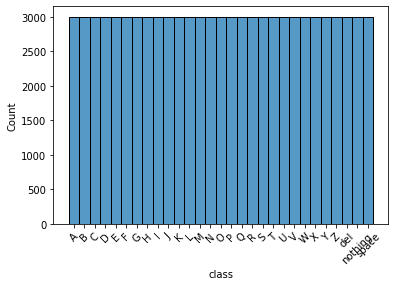

In [45]:
plt.xticks(rotation=45)
df = df.sort_values('class')
sns.histplot(data=df, x='class')

Display some example images.

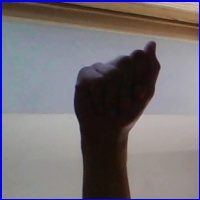

In [47]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

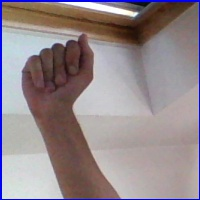

In [49]:
Image(filename=df['filepath'].values[1])